![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/logo_MCV_W.png)

# **Add and Remove Noisen**

####**In this lesson we'll learn:**
1. How to add white noise or film grain effects to images

### **What is Noise?**

![](https://2.bp.blogspot.com/-b-hwrNlSs4Y/V6IKh7NamaI/AAAAAAAAOB4/rJ7oPYVKZgg2Py9eA7pR62Lbn1yNJjnvwCLcB/s1600/ISO-Noise.jpg)

Digital Camera sensors can take pictures in low light environments by increasing the sensativity of the camera sensor (CCD). However, this increase in sensativity (ISO increase) comes with a price. The price is noise. Noise arises because the higher sensativity of the sensor makes it susceptible to random noise. This is because the in low light scenes there isn't much variation between the scene and random photon noise. 

https://blog.michaeldanielho.com/2016/08/understanding-cameras-exposure-setting.html

In [ ]:
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/soaps.jpeg

--2023-06-05 06:43:18--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.144.6
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.144.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  19.2MB/s    in 1.5s    

2023-06-05 06:43:20 (19.2 MB/s) - ‘images.zip’ saved [29586716/29586716]

--2023-06-05 06:43:20--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/soaps.jpeg
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/soaps.jpeg [following

In [ ]:
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt

def imshow(title = "Image", image = None, size = 10):
  h, w = image.shape[:2]
  aspect_ratio = w/h
  plt.figure(figsize=(size * aspect_ratio,size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.title(title)
  plt.show()


## **Adding Film Grain or Noise to Images**

In [ ]:
def addWhiteNoise(image):
    # Set the range for a random probablity
    # A large prob will make more noise
    prob = random.uniform(0.05, 0.1)

    # Generate a random matrix in the shape of our input image
    rnd = np.random.rand(image.shape[0], image.shape[1])

    # If the random values in our rnd matrix are less than our random probability
    # We randomly change that pixel in our input image to a value within the range specified
    image[rnd < prob] = np.random.randint(50,230)
    return image

In [ ]:
image = cv2.imread('images/londonxmas.jpeg')
imshow("Input Image", image)

# Apply our white noise function to our input image 
noise_1 = addWhiteNoise(image)
imshow("Noise Added", noise_1)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def addBlackNoise(image):
    prob = random.uniform(0.05, 0.1)

    rnd = np.random.rand(image.shape[0], image.shape[1])

    image[rnd < prob] = np.random.randint(0,50)
    return image

image = cv2.imread('images/londonxmas.jpeg')
imshow("Input Image", image)

noise_2 = addWhiteNoise(image)
imshow("Noise Added", noise_2)

Output hidden; open in https://colab.research.google.com to view.

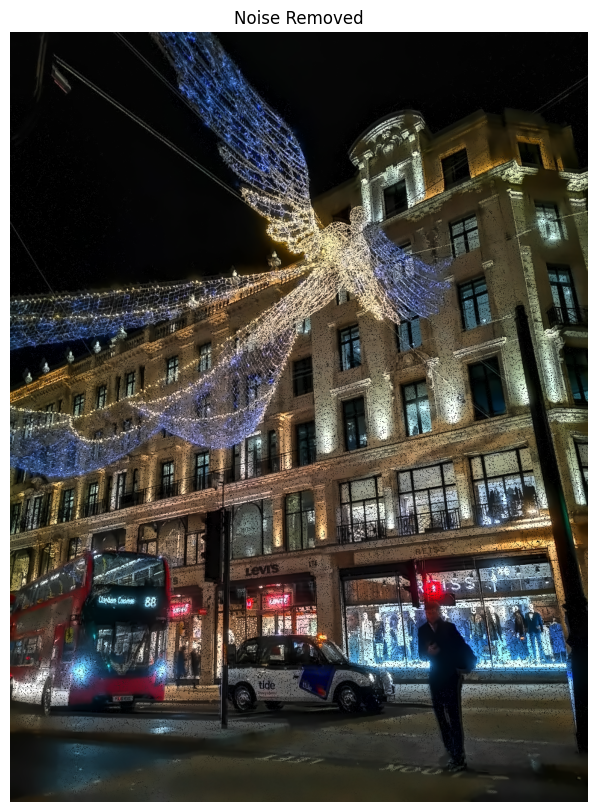

In [ ]:
# cv2.fastNlMeansDenoisingColored(input, None, h, hForColorComponents, templateWindowSize, searchWindowSize)
# None are - the filter strength 'h' (5-12 is a good range)
# Next is hForColorComponents, set as same value as h again
# templateWindowSize (odd numbers only) rec. 7
# searchWindowSize (odd numbers only) rec. 21

dst = cv2.fastNlMeansDenoisingColored(noise_1, 7, 11, 6, 7, 21)

imshow("Noise Removed", dst)

In [ ]:
image = cv2.imread('images/londonxmas.jpeg', cv2.IMREAD_GRAYSCALE)
imshow("Input Image", image)

# Apply our white noise function to our input image 
noise_3 = addWhiteNoise(image)
imshow("Noise Added", noise_3)
dst = cv2.fastNlMeansDenoising(noise_3, 7, 6, 7, 21)

imshow("Noise Removed", dst)

Output hidden; open in https://colab.research.google.com to view.

**There are 4 variations of Non-Local Means Denoising:**

- cv2.fastNlMeansDenoising() - works with a single grayscale images
- cv2.fastNlMeansDenoisingColored() - works with a color image.
- cv2.fastNlMeansDenoisingMulti() - works with image sequence captured in short period of time (grayscale images)
- cv2.fastNlMeansDenoisingColoredMulti() - same as above, but for color images.